<a href="https://colab.research.google.com/github/hsnam95/my/blob/main/%5BNH%5D_Python_for_Topic_Modelling_(ALL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import re
import matplotlib.pyplot as plt
import gensim
from gensim import models
from gensim.models import Phrases, CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.corpora import Dictionary

load data

In [ ]:
from google.colab import files
a = files.upload()
fn = list(a.keys())[0]
import pandas as pd
df_news = pd.read_csv(fn)

clean-up

In [12]:
black_list = [
                                  "a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z", # 개별 알파벳(alfabeto) 
                                       
                                 "al", "del","de","en", "hacia", "por", "para", "entre",'sobre','según', #전치사(preposiciones)
                                 "con","comigo","contigo", "consigo", "sin",

                                 'cual', 'cuál', 'cuales', 'cuáles', 'cualquier', 'cualquiera', 'cualquieras', #관계사(relativos) & 의문사(interrogativos) (2)
                                 'cuan', 'cuán', 'cuando', 'cuándo', 'cuanta','cuánta', 'cuantas', 'cuántas', 'cuanto', 'cuánto', 'cuantos', 'cuántos',   #관계사(relativos) & 의문사(interrogativos) (1)
                                 'donde', 'dónde', 'adonde', 'adónde','como', 'cómo',                                  #관계사(relativos) & 의문사(interrogativos) (3)
                                 'que', 'qué', 'quien', 'quién', 'quienes', 'quiénes','quienesquiera', 'quienquiera', #관계사(relativos) & 의문사(interrogativos) (4)
                                 'cuyo', 'cuya','cuyos','cuyas', #관계사(relativos) & 의문사(interrogativos) (4)   

                                 'el', 'la', 'las', 'le', 'les', 'lo', 'los', 'un', 'una', 'unas', 'uno', 'unos', #관사(articulos)
                                 'yo', 'me', 'mi', 'mí', 'mia', 'mía', 'mias', 'mías','mio','mío', 'mios', 'míos', 'mis', #대명사(prombres)-1S
                                 'nos', 'nosotras', 'nosotros', 'nuestra', 'nuestras', 'nuestro', 'nuestros', #대명사(prombres)-1P
                                 'vosotras', 'vosotros', 'vuestra', 'vuestras', 'vuestro', 'vuestros', 'os', #대명사(prombres)-2P
                                 'él', 'ella', 'ellas', 'ello', 'ellos', #대명사(prombres)-3S (1)
                                 'ud', 'uds', 'usted','ustedes', 'vd', 'vds', 'se', 'su', 'sus', 'suya', 'suyas', 'suyo', 'suyos', #대명사(prombres)-3S (2)
                                 'te', 'ti', 'tí', 'tu', 'tú', 'tus', 'tuya', 'tuyas', 'tuyo', 'tuyos', #대명사(prombres)-2S

                                 #'este', 'esta', 'estos', 'estas', 'ese', 'esa', 'esos', 'esas','aquel', 'aquella', 'aquellos', 'aquellas', #지시사(demostrativos)

                                 'era', 'erais', 'eramos', 'éramos', 'eran', 'eras',  #SER 동사활용형(1)
                                 'eres', 'es', 'sea', 'seáis', 'seamos', 'sean', 'seas','sois', 'somos','son', 'soy', #SER 동사활용형(2)
                                 'fue', 'fué', 'fui', 'fuí', 'fuimos', 'fuiste', 'fuisteis', #SER 동사활용형(3)
                                 'fuera', 'fuerais', 'fuéramos', 'fueran', 'fueras', 'fueron', 'fuese', 'fueseis', 'fuésemos','fuesen', 'fueses', #SER 동사활용형(4)
                                 'será', 'serán', 'serás', 'seré', 'seréis', 'seremos', #SER 동사활용형(5)
                                 'sería', 'seríais', 'seríamos', 'serían', 'serías', #SER 동사활용형(6)
                                 'sido', 'siendo', #SER 동사활용형(7)

                                 'estar', 'está', 'estais', 'estáis', 'estamos', 'estan', 'están','estás', 'estoy',  #ESTAR 동사활용형(1)
                                 'estaba', 'estabais', 'estábamos', 'estaban', 'estabas', #ESTAR 동사활용형(2)
                                 'estada', 'estadas', 'estando', 'estad', #ESTAR 동사활용형(3)
                                 'estará', 'estarán', 'estarás', 'estaré', 'estaréis', 'estaremos', #ESTAR 동사활용형(4)
                                 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', #ESTAR 동사활용형(5)
                                 'esté', 'estéis', 'estemos', 'estén', 'estés', #ESTAR 동사활용형(6) 
                                 'estuve', 'estuviera', 'estuvierais', 'estuviéramos', 'estuvieran', 'estuvieras', 'estuvieron', #ESTAR 동사활용형(7)
                                 'estuviese', 'estuvieseis', 'estuviésemos', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste', 'estuvisteis', 'estuvo',  #ESTAR 동사활용형(8)

                                 'haber', 'ha', 'habéis', 'han', 'has', 'hay', 'he', 'hemos',  #HABER 동사활용형(1)
                                 'habia', 'había', 'habíais', 'habíamos', 'habían', 'habías',  #HABER 동사활용형(2)
                                 'habida', 'habidas', 'habido', 'habidos', 'habiendo',         #HABER 동사활용형(3)
                                 'habrá', 'habrán', 'habrás', 'habré', 'habréis', 'habremos',  #HABER 동사활용형(4)
                                 'habría', 'habríais', 'habríamos', 'habrían', 'habrías',      #HABER 동사활용형(5)
                                 'haya', 'hayáis', 'hayamos', 'hayan', 'hayas',                #HABER 동사활용형(6)
                                 'hube', 'hubimos', 'hubiste', 'hubisteis', 'hubo',            #HABER 동사활용형(7)
                                 'hubiera', 'hubierais', 'hubiéramos', 'hubieran', 'hubieras', 'hubieron',  #HABER 동사활용형(8) 
                                 'hubiese', 'hubieseis', 'hubiésemos', 'hubiesen', 'hubieses', #HABER 동사활용형(9) 

                                 'ni','no','jamás','nunca','nada','ningún','ninguna','ninguno', #부정어(negativos)
                                 'pero','mas', 'aunque','pues','porque','si','sí', #접속사(conjunciones)
                                 'algo','algún','alguna','algunas','alguno','algunos', #부정어(indefinidos)
                                 'embargo',                                     #기타(etc)                                                                   ))         
  
                                   "LBR",
                                   "ttl",
                                   "mtl",
                                   "ftl",
                                   "=","===============================================",
                                   "01","02","03","04","05","06","07","08","09"]

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('spanish'))
additional_stopwords=set(black_list)
stopwords = stop.union(additional_stopwords)

In [ ]:
import spacy
!python -m spacy download es_core_news_sm
nlp = spacy.load("es_core_news_sm")

In [16]:
def lemmatization(texts):
    texts_out = [token.text for token in nlp(texts) if token.text not in black_list and len(token.text)>2]
    return texts_out

In [22]:
# Detect phrases, based on collected collocation counts. Adjacent words that appear together more frequently than expected are joined together with the _ character.
bigram = gensim.models.Phrases(df_news.texto.to_list())

In [23]:
def cleaner(word):
  word = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', '', word, flags=re.MULTILINE)
  word = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', "", word)
  word = re.sub(r'ee.uu', 'eeuu', word)
  word = re.sub(r'\#\.', '', word)
  word = re.sub(r'\n', '', word)
  word = re.sub(r',', '', word)
  word = re.sub(r'\-', ' ', word)
  word = re.sub(r'\.{3}', ' ', word)
  word = re.sub(r'a{2,}', 'a', word)
  word = re.sub(r'é{2,}', 'é', word)
  word = re.sub(r'i{2,}', 'i', word)
  word = re.sub(r'ja{2,}', 'ja', word) 
  word = re.sub(r'á', 'a', word)
  word = re.sub(r'é', 'e', word)
  word = re.sub(r'í', 'i', word)
  word = re.sub(r'ó', 'o', word)
  word = re.sub(r'ú', 'u', word)  
  word = re.sub('[^a-zA-Z]', ' ', word)
  list_word_clean = []
  for w1 in word.split(" "):
    if  w1.lower() not in stopwords:
      list_word_clean.append(w1.lower())

  bigram_list = bigram[list_word_clean]
  # 재조합해서 lemmatize한 list
  out_text = lemmatization(" ".join(bigram_list))
  return out_text

In [ ]:
df_news['texto'] = df_news['texto'].apply(cleaner)

prepare corpus for gensim topic modeling

In [25]:
dictionary = Dictionary(df_news['texto'].to_list())
dictionary.compactify() #??
# Filter extremes
dictionary.filter_extremes(no_below=2, no_above=0.97, keep_n=None)
dictionary.compactify() #??

corpus = [dictionary.doc2bow(text) for text in df_news['texto'].to_list()]

# Evaluate models

preparing useful functions

a function to display topics better (for HDP, LSI, LDA)

In [28]:
def display_topics(model, model_type="lda"): # for all models
  for topic_idx, topic in enumerate(model.print_topics()):
    print ("Topic %d:" % (topic_idx))
    if model_type== "hdp":
      print (" ".join(re.findall( r'\*(.[^\*-S]+).?', topic[1])), "\n")
    else:
      print (" ".join(re.findall( r'\"(.[^"]+).?', topic[1])), "\n")

a function to evaluate the number of topics (for LSI, LDA only)

In [30]:
def evaluate_graph(dictionary, corpus, texts, limit, model): # for LSI, LDA
    """
    Function to display num_topics - LDA graph using c_v coherence
    
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit
    
    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    c_v = []
    lm_list = []
    for num_topics in range(1, limit):
        if model == 'lsi':
          lm = LsiModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        else:
          lm = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(cm.get_coherence())
        
    # Show graph
    x = range(1, limit)
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()
    
    return lm_list, c_v

1. Hierarchical Dirichlet process Model

In [ ]:
import time
time.clock = time.time
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary, random_state= 30)

2. Latent Semantic Indexing model

In [ ]:
lmlist_lsi, c_v = evaluate_graph(dictionary=dictionary, corpus=corpus, texts=df_news['texto'].to_list(), limit=21, model= "lsi")

3. Latent Dirichlet Allocation Model

In [ ]:
lmlist_lda, c_v = evaluate_graph(dictionary=dictionary, corpus=corpus, texts=df_news['texto'].to_list(), limit=21, model= "lda")

# select a best model for LSI and LDA and report the summary of all three models (HDP, LSI, LDA)

In [43]:
ldamodel = lmlist_lda[5]
lsimodel = lmlist_lsi[2]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]
ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [34]:
hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=df_news['texto'].to_list(), dictionary=dictionary, window_size=10).get_coherence() 
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=df_news['texto'].to_list(), dictionary=dictionary, window_size=10).get_coherence() 
lda_coherence = CoherenceModel(topics=ldatopics, texts=df_news['texto'].to_list(), dictionary=dictionary, window_size=10).get_coherence() 

In [ ]:
import seaborn as sns

coherences = [hdp_coherence, lsi_coherence, lda_coherence]
n = len(coherences)
x = ['hdp_coherence', 'lsi_coherence', 'lda_coherence']
sns.barplot(x, coherences)

# Assign a dominant topic to each document (with LDA selected)

In [44]:
def format_topics_sentences(ldamodel=0, corpus=corpus, texts=0):
    # Init output
    sent_topics_df = pd.DataFrame()-n

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [45]:
df_topic_sents_keywords = format_topics_sentences(ldamodel, corpus=corpus, texts=df_news['texto'].to_list())

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(500)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.9174,"mar, ojos, tiempo, corazon, tarde, tierra, oro...","[sala, familiar, sombria, querido, hermano, su..."
1,1,2.0,0.8805,"claro, corazon, agua, mar, calle, tierra, luna...","[andado, caminos, abierto, muchas, veredas, na..."
2,2,2.0,0.8542,"claro, corazon, agua, mar, calle, tierra, luna...","[plaza, naranjos, encendidos, frutas, redondas..."
3,3,5.0,0.5471,"ana, luna, ayer, mar, tierra, sue, amor, flor,...","[tierra, dieron, tarde, horrible, mes, julio, ..."
4,4,5.0,0.8611,"ana, luna, ayer, mar, tierra, sue, amor, flor,...","[tarde, parda, fria, invierno, colegiales, est..."
...,...,...,...,...,...
495,495,5.0,0.7935,"ana, luna, ayer, mar, tierra, sue, amor, flor,...","[plaza, torrela, torre, balconel, balcon, dama..."
496,496,3.0,0.7359,"busca, espejo, blanca, corazon, solo, tierra, ...","[calle, celosen, veinte, rejas, otrohablando, ..."
497,497,2.0,0.6344,"claro, corazon, agua, mar, calle, tierra, luna...","[malos, sue, despertare]"
498,498,0.0,0.5832,"mar, ojos, tiempo, corazon, tarde, tierra, oro...","[despertarancampanas, albaque, sonando]"


# assign a specific name to a topic and possible analyises

In [38]:
label_dicc = {0:'TEMA1', 1:'TEMA2', 2:'TEMA3', 3: 'TEMA4', 4:'TEMA5', 5:'TEMA6', 6:'TEMA7', 
              7:'TEMA8', 8:'TEMA9', 9: 'TEMA10', 10:'TEMA11', 11:'TEMA12'}
df_dominant_topic['Dominant_Topic'] = df_dominant_topic['Dominant_Topic'].astype('int64')
df_dominant_topic['Dominant_Topic'] = df_dominant_topic['Dominant_Topic'].map(label_dicc)
df_news['labels'] = df_dominant_topic['Dominant_Topic']

Let's examine some text and its topics.

In [39]:
df_news[ df_news['labels'] == 'TEMA5'].head().texto

25    [figuras, atrio, humildes, cada, dia, lejanas,...
31    [ascuas, crepusculo, morado, detras, negro, ci...
33    [dijo, alba, primavera, floreci, corazon, somb...
36    [dime, noche, amiga, amada, vieja, traes, reta...
38    [llega, sediento, ver, agua, correr, dice, sed...
Name: texto, dtype: object

Let's see the distribution of topics to check if the topis are balanced


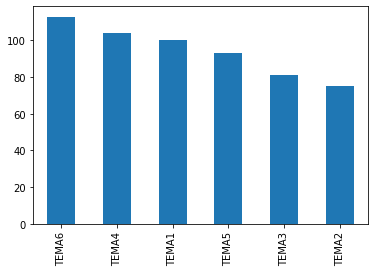

In [40]:
ax = df_dominant_topic['Dominant_Topic'].value_counts().plot(kind='bar')
plt.show()

# Final visualization!

In [ ]:
!pip install pyLDAvis

In [42]:
import pyLDAvis, pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.038299  0.019745       1        1  20.374380
0     -0.010237 -0.017354       2        1  18.769952
3      0.000822 -0.014822       3        1  17.398706
4      0.024623  0.034492       4        1  15.055135
2      0.010354 -0.009413       5        1  15.024520
1      0.012737 -0.012648       6        1  13.377307, topic_info=         Term      Freq     Total Category  logprob  loglift
10      claro  3.000000  3.000000  Default  30.0000  30.0000
579     busca  2.000000  2.000000  Default  29.0000  29.0000
1616  hombres  1.000000  1.000000  Default  28.0000  28.0000
2283   teatro  1.000000  1.000000  Default  27.0000  27.0000
1205    vivir  2.000000  2.000000  Default  26.0000  26.0000
...       ...       ...       ...      ...      ...      ...
158      azul  0.447798  2.556140   Topic6  -6.5073   0.2697
671       voz  0.440584  2.383141   Topic6  -6.5235   0.3235
166      flor  0.440773  2.626254   Topic6  -6.5231   0.2268
467      ojos  0.448097  4.317489   Topic6  -6.5066  -0.2538
534      amor  0.440145  3.917390   Topic6  -6.5245  -0.1745

[399 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
533       6  0.637599      aba
2405      2  0.761299  abanico
94        1  0.214410     agua
94        2  0.214410     agua
94        3  0.214410     agua
...     ...       ...      ...
1205      4  0.455112    vivir
153       3  0.837771    voces
1017      2  0.744798    volar
671       4  0.419614      voz
712       2  0.830918    vuelo

[261 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 4, 5, 3, 2])